### Import Pandas

In [178]:
import pandas as pd

pd.set_option("display.float_format", "{:.2f}".format)

### Read in necessary datasets 

In [179]:
availability = pd.read_csv("availability.csv")
weather = pd.read_csv("weather.csv")

### Convert necessary objects to datetime objects

In [180]:
availability["last_update"] = pd.to_datetime(availability["last_update"])
weather["Timestamp"] = pd.to_datetime(weather["Timestamp"])

availability = availability.sort_values(by="last_update")
weather = weather.sort_values(by="Timestamp")

### Resample rows to have bike station data match the weather data around the same half hour

In [181]:
import pandas as pd


def find_nearest_weather(bike_last_update, weather_df):
    # Calculating the absolute time difference between bike update and each weather record
    time_diff = weather_df["Timestamp"] - bike_last_update
    abs_time_diff = time_diff.abs()

    # Filtering to find weather records within 30 minutes of the bike update
    within_30mins = abs_time_diff[abs_time_diff <= pd.Timedelta(minutes=30)]

    if within_30mins.empty:
        return None
    else:
        # Returning the index of the closest weather record
        return within_30mins.idxmin()


# Applying the function to create a new column in 'availability'
availability["WeatherIndex"] = availability["last_update"].apply(
    lambda x: find_nearest_weather(x, weather)
)

# Merging the datasets using the index of weather records
combined_data = availability.merge(
    weather, how="left", left_on="WeatherIndex", right_index=True
)

# Dropping the 'WeatherIndex' column as it's no longer needed
combined_data.drop(columns=["WeatherIndex"], inplace=True)

### Displaying a sample of combined data to illustrate resampling

In [187]:
combined_data.sample(5)

,number,last_update,available_bikes,available_bike_stands,status,WeatherID,Timestamp,Temperature,FeelsLike,TempMin,TempMax,Pressure,Humidity,Visibility,WindSpeed,WindDeg,Cloudiness,WeatherCondition,WeatherDescription
194706,52,2024-03-27 20:05:03,1,31,OPEN,1305,2024-03-27 20:00:03,4.58,0.64,3.81,5.48,974,83,10000,5.36,180,40,Rain,light rain
939386,22,2024-03-04 21:25:03,8,12,OPEN,212,2024-03-04 21:30:03,6.35,2.87,5.72,7.14,996,89,10000,5.36,190,100,Clouds,overcast clouds
326193,67,2024-03-23 18:45:02,4,36,OPEN,1110,2024-03-23 18:30:03,8.27,3.63,7.70,8.64,1012,70,10000,11.32,290,75,Clouds,broken clouds
441060,27,2024-03-20 05:25:02,0,20,OPEN,940,2024-03-20 05:30:03,8.20,8.20,7.70,8.52,1015,93,6000,0.51,360,75,Rain,light rain
692899,113,2024-03-12 11:25:02,10,30,OPEN,570,2024-03-12 11:30:07,12.67,12.11,11.51,13.65,1003,81,10000,8.23,240,75,Clouds,broken clouds


In [188]:
combined_dupe_df = combined_data.copy()

### Combining Station Static Data to get a complete dataframe

In [189]:
final_df = combined_dupe_df

In [190]:
final_df.sample(5)

,number,last_update,available_bikes,available_bike_stands,status,WeatherID,Timestamp,Temperature,FeelsLike,TempMin,TempMax,Pressure,Humidity,Visibility,WindSpeed,WindDeg,Cloudiness,WeatherCondition,WeatherDescription
969984,29,2024-03-03 22:45:03,27,2,OPEN,167,2024-03-03 22:30:03,3.48,0.25,1.98,5.48,1004,88,10000,3.60,170,20,Clouds,few clouds
298936,101,2024-03-24 14:45:02,1,29,OPEN,1150,2024-03-24 14:30:03,11.06,9.97,9.51,12.35,1011,67,10000,3.09,220,75,Clouds,broken clouds
339301,61,2024-03-23 08:50:02,4,21,OPEN,1091,2024-03-23 09:00:04,5.26,0.78,4.20,6.80,1012,86,8000,7.20,270,75,Clouds,broken clouds
920497,105,2024-03-05 11:25:03,0,36,OPEN,238,2024-03-05 11:30:04,8.04,3.92,7.35,9.21,1009,80,10000,8.75,220,75,Clouds,broken clouds
368538,7,2024-03-22 11:20:02,1,28,OPEN,1048,2024-03-22 11:30:03,9.86,6.07,9.20,10.88,1019,60,10000,9.77,270,20,Clouds,few clouds


### Describing Data Frame

In [191]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1083228 entries, 1083227 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   number                 1083228 non-null  int64         
 1   last_update            1083228 non-null  datetime64[ns]
 2   available_bikes        1083228 non-null  int64         
 3   available_bike_stands  1083228 non-null  int64         
 4   status                 1083228 non-null  object        
 5   WeatherID              1083228 non-null  int64         
 6   Timestamp              1083228 non-null  datetime64[ns]
 7   Temperature            1083228 non-null  float64       
 8   FeelsLike              1083228 non-null  float64       
 9   TempMin                1083228 non-null  float64       
 10  TempMax                1083228 non-null  float64       
 11  Pressure               1083228 non-null  int64         
 12  Humidity               1083228 no

### Converting Features to Correct data type

In [193]:
categorical_columns = [
    "number",
    "WeatherID",
    "WeatherCondition",
    "WeatherDescription",
]
for col in categorical_columns:
    final_df[col] = final_df[col].astype("category")

### Tracking Time period for data

In [194]:
# Get the earliest and latest dates
earliest_date = final_df["last_update"].min()
latest_date = final_df["last_update"].max()

print(f"Data recorded from {earliest_date} to {latest_date}")

Data recorded from 2024-02-29 11:24:58 to 2024-04-02 19:30:03


In [195]:
pd.set_option("display.float_format", "{:.2f}".format)

In [196]:
# Get the number of rows and columns
num_rows, num_cols = final_df.shape

print(f"There are {num_rows} rows and {num_cols} columns in the DataFrame.")

There are 1083228 rows and 19 columns in the DataFrame.


### Descriptive Data Exploration for Numerical Data


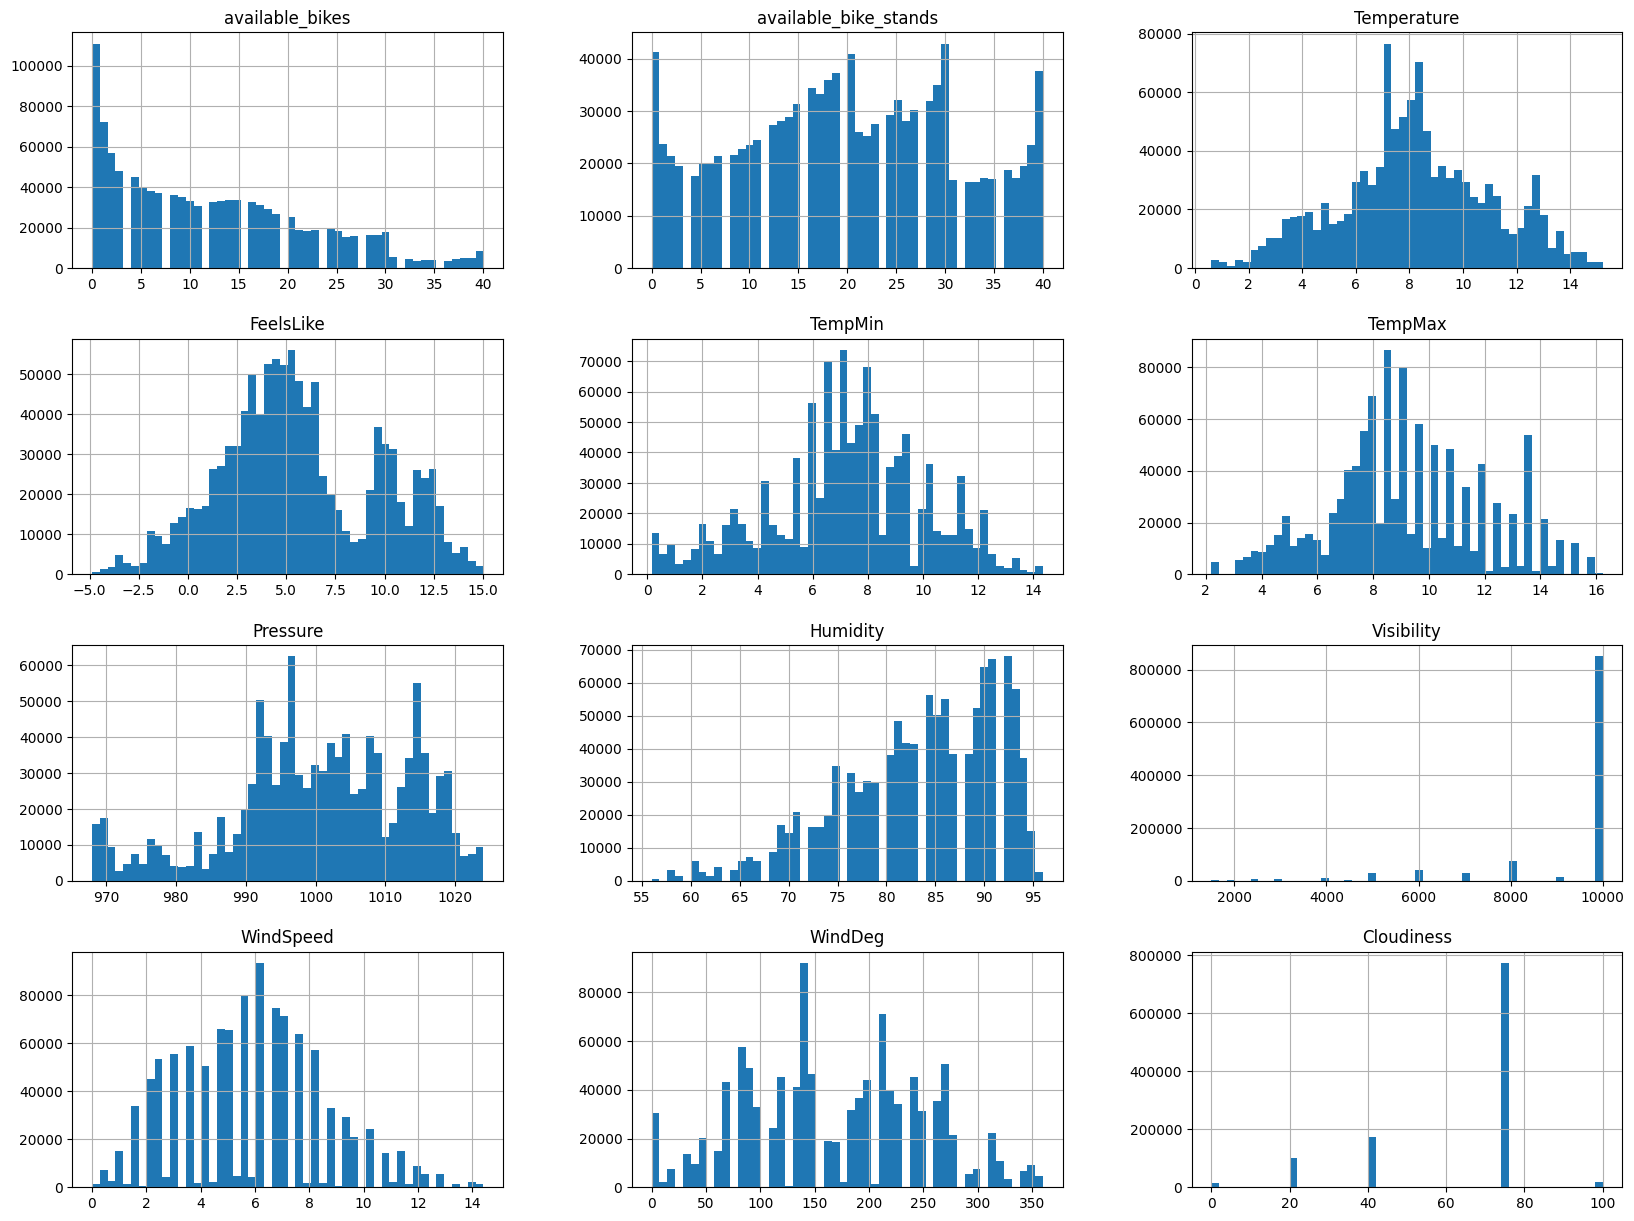

,available_bikes,available_bike_stands,Temperature,FeelsLike,TempMin,TempMax,Pressure,Humidity,Visibility,WindSpeed,WindDeg,Cloudiness
available_bikes,1.00,-0.75,-0.03,-0.03,-0.02,-0.03,-0.01,0.01,-0.00,-0.01,-0.01,-0.00
available_bike_stands,-0.75,1.00,0.02,0.02,0.02,0.02,0.00,-0.01,0.00,0.01,0.01,0.01
Temperature,-0.03,0.02,1.00,0.95,0.98,0.99,0.21,-0.33,0.11,0.18,0.14,0.24
FeelsLike,-0.03,0.02,0.95,1.00,0.92,0.96,0.19,-0.25,0.12,-0.05,0.14,0.19
TempMin,-0.02,0.02,0.98,0.92,1.00,0.94,0.20,-0.28,0.08,0.22,0.12,0.30
TempMax,-0.03,0.02,0.99,0.96,0.94,1.00,0.23,-0.34,0.13,0.15,0.17,0.18
Pressure,-0.01,0.00,0.21,0.19,0.20,0.23,1.00,-0.21,0.08,0.06,0.32,-0.09
Humidity,0.01,-0.01,-0.33,-0.25,-0.28,-0.34,-0.21,1.00,-0.36,-0.31,-0.23,0.20
Visibility,-0.00,0.00,0.11,0.12,0.08,0.13,0.08,-0.36,1.00,0.01,0.29,-0.24
WindSpeed,-0.01,0.01,0.18,-0.05,0.22,0.15,0.06,-0.31,0.01,1.00,0.10,0.14


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = final_df.select_dtypes(include=["int64", "float64"])
numerical_data.describe()
# Histograms for each column
numerical_data.hist(bins=50, figsize=(20, 15))
plt.show()


corr_matrix = numerical_data.corr()
corr_matrix

### Descriptives for categorical data

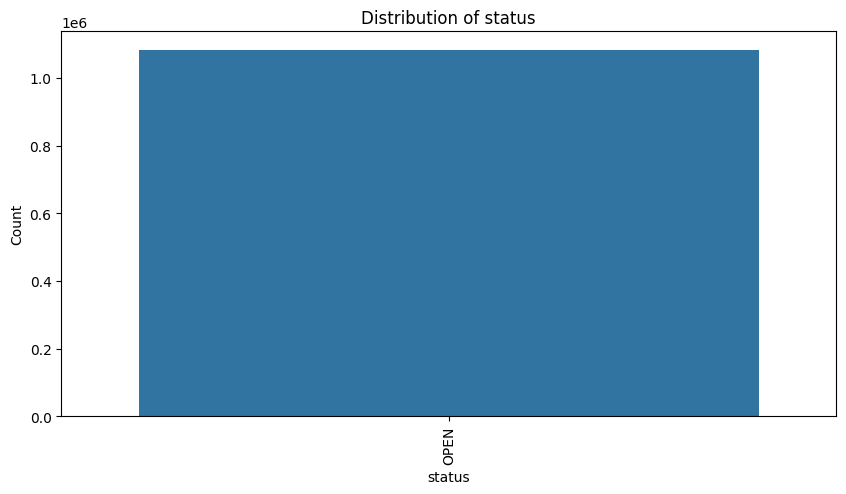

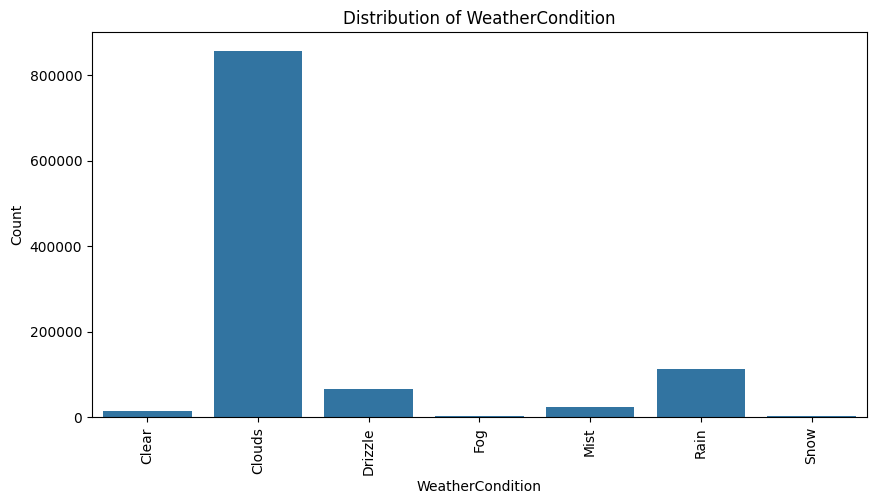

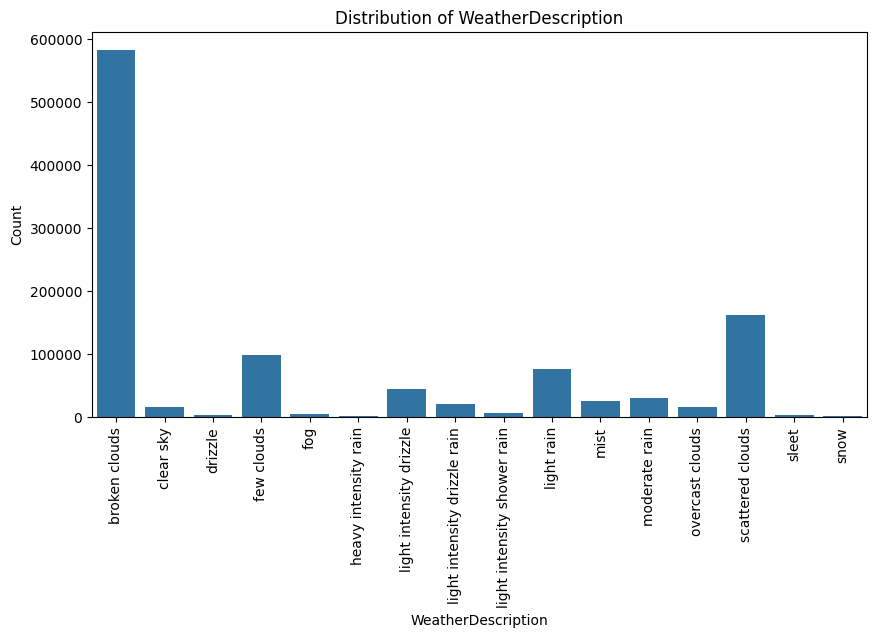

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only categorical columns
categorical_data = final_df.select_dtypes(include=["category", "object"])
categorical_data = categorical_data.drop(columns=["number", "WeatherID"])
categorical_data.describe()
# For each categorical column
for col in categorical_data.columns:
    # Create a count plot
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=categorical_data)

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

In [204]:
# Converting categorical variables to numerical
categorical_data_encoded = pd.get_dummies(categorical_data)

categorical_data_encoded["available_bikes"] = final_df["available_bikes"]

# Calculating the correlation
correlation = categorical_data_encoded.corr()["available_bikes"]

# Printing the correlation
print(correlation)

status_OPEN                                         NaN
WeatherCondition_Clear                             0.00
WeatherCondition_Clouds                           -0.00
WeatherCondition_Drizzle                          -0.00
WeatherCondition_Fog                              -0.00
WeatherCondition_Mist                              0.00
WeatherCondition_Rain                              0.00
WeatherCondition_Snow                              0.00
WeatherDescription_broken clouds                  -0.00
WeatherDescription_clear sky                       0.00
WeatherDescription_drizzle                        -0.00
WeatherDescription_few clouds                      0.00
WeatherDescription_fog                            -0.00
WeatherDescription_heavy intensity rain           -0.00
WeatherDescription_light intensity drizzle        -0.01
WeatherDescription_light intensity drizzle rain    0.00
WeatherDescription_light intensity shower rain     0.00
WeatherDescription_light rain                   

### Extracting Useful Features for prediction

In [201]:
# Assuming 'Timestamp' is your datetime column
final_df["year"] = final_df["Timestamp"].dt.year
final_df["month"] = final_df["Timestamp"].dt.month
final_df["day"] = final_df["Timestamp"].dt.day
final_df["hour"] = final_df["Timestamp"].dt.hour

# Now you can drop the original 'Timestamp' column
final_df = final_df.drop(columns=["Timestamp"])

In [157]:
final_df.sample(5)

,number,last_update,available_bikes,available_bike_stands,status,WeatherID,Temperature,FeelsLike,TempMin,TempMax,...,Visibility,WindSpeed,WindDeg,Cloudiness,WeatherCondition,WeatherDescription,year,month,day,hour
938674,21,2024-03-04 22:00:03,0,30,OPEN,213,5.83,2.41,5.16,6.30,...,10000,4.92,190,100,Clouds,overcast clouds,2024,3,4,22
118240,10,2024-03-30 04:50:03,16,0,OPEN,1418,6.44,4.47,5.31,7.41,...,10000,2.68,182,20,Clouds,few clouds,2024,3,30,5
928478,48,2024-03-05 05:35:02,25,15,OPEN,227,7.14,1.80,6.43,7.51,...,10000,12.86,200,75,Clouds,broken clouds,2024,3,5,5
467206,77,2024-03-19 10:10:02,15,14,OPEN,901,11.10,10.43,10.35,11.98,...,10000,5.66,240,40,Clouds,scattered clouds,2024,3,19,10
641180,87,2024-03-14 02:00:04,9,29,OPEN,646,8.23,6.33,7.35,9.02,...,3000,3.09,80,75,Drizzle,light intensity drizzle rain,2024,3,14,2


### Dropping Non-essential columns for prediction to prevent overfitting

In [159]:
# Dropping non-essential columns
final_df.drop(
    columns=[
        "last_update",
        "FeelsLike",
        "available_bike_stands",
        "WeatherID",
        "TempMin",
        "WeatherCondition",
        "status",
    ],
    inplace=True,
)

In [160]:
final_df.drop(
    columns=["TempMax", "Pressure", "Visibility", "WindDeg", "Cloudiness"],
    inplace=True,
)

In [162]:
final_df.drop(columns=["WeatherDescription", "Humidity"], inplace=True)

### Saving Final Dataset to csv

In [163]:
final_df.to_csv("deeplearning.csv", index=False)

In [164]:
data = pd.read_csv("deeplearning.csv")

## Info for training data

In [165]:
data.info()
pd.set_option("display.float_format", "{:.2f}".format)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083228 entries, 0 to 1083227
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   number           1083228 non-null  int64  
 1   available_bikes  1083228 non-null  int64  
 2   Temperature      1083228 non-null  float64
 3   WindSpeed        1083228 non-null  float64
 4   year             1083228 non-null  int64  
 5   month            1083228 non-null  int64  
 6   day              1083228 non-null  int64  
 7   hour             1083228 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 66.1 MB


### Running Descriptives again for final df

          number  available_bikes  Temperature  WindSpeed       year  \
count 1083228.00       1083228.00   1083228.00 1083228.00 1083228.00   
mean       58.82            11.99         8.21       5.86    2024.00   
std        34.12            10.01         2.80       2.69       0.00   
min         1.00             0.00         0.61       0.00    2024.00   
25%        29.00             3.00         6.55       3.60    2024.00   
50%        58.50            10.00         8.13       5.66    2024.00   
75%        89.00            19.00        10.04       7.72    2024.00   
max       117.00            40.00        15.22      14.40    2024.00   

           month        day       hour  
count 1083228.00 1083228.00 1083228.00  
mean        3.04      15.39      11.55  
std         0.26       9.40       6.90  
min         2.00       1.00       0.00  
25%         3.00       7.00       6.00  
50%         3.00      15.00      12.00  
75%         3.00      24.00      17.00  
max         4.00      3

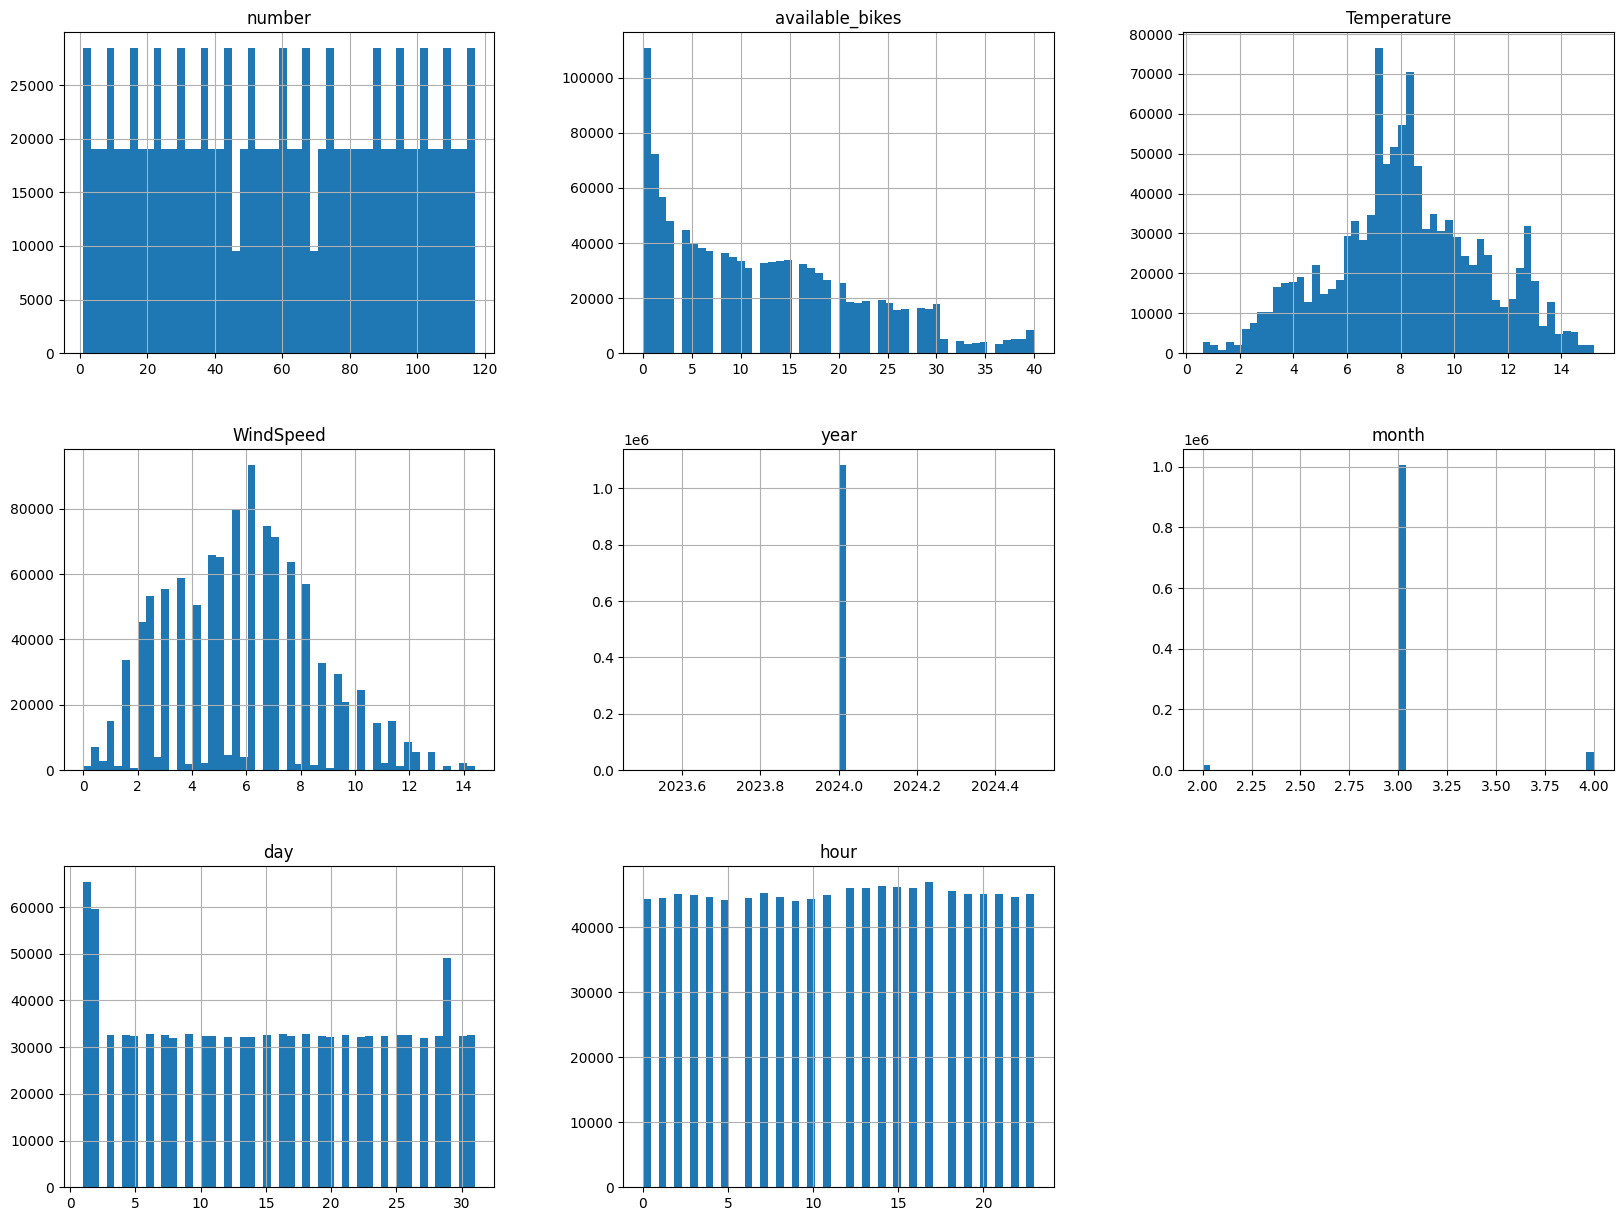

,number,available_bikes,Temperature,WindSpeed,year,month,day,hour
number,1.00,0.08,0.00,0.00,NaN,-0.00,-0.00,0.00
available_bikes,0.08,1.00,-0.03,-0.01,NaN,0.00,-0.00,-0.01
Temperature,0.00,-0.03,1.00,0.18,NaN,0.08,0.20,0.21
WindSpeed,0.00,-0.01,0.18,1.00,NaN,-0.13,-0.09,0.07
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.00,0.00,0.08,-0.13,NaN,1.00,-0.40,-0.08
day,-0.00,-0.00,0.20,-0.09,NaN,-0.40,1.00,0.03
hour,0.00,-0.01,0.21,0.07,NaN,-0.08,0.03,1.00


In [166]:
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])


# Summary statistics for each column


# Histograms for each column
numeric_data.hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix

In [1]:
a.describe()

NameError: name 'data' is not defined

### Model Training - Regression Model Built using a neural network in Tensorflow

In [168]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError


# Selecting features and target
X = data.drop(["available_bikes"], axis=1)
y = data["available_bikes"]

# Preprocessing for numeric and categorical data
numeric_features = ["Temperature", "WindSpeed", "day", "hour", "month", "year"]
categorical_features = ["number"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_processed = preprocessor.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Building the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1),
])


# Compiling the model
model.compile(optimizer="adam", loss=MeanSquaredError(), metrics=["mae"])
early_stopping = EarlyStopping(monitor="val_loss", patience=25)

# Training the model
history = model.fit(
    X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping]
)

# Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

/Users/evanmac/miniconda3/envs/flask_dev/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 14s 584us/step - loss: 57.7960 - mae: 5.9355 - val_loss: 34.5076 - val_mae: 4.5119
Epoch 2/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 13s 586us/step - loss: 38.0206 - mae: 4.7131 - val_loss: 28.2535 - val_mae: 4.0133
Epoch 3/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 12s 574us/step - loss: 32.7613 - mae: 4.3362 - val_loss: 24.8179 - val_mae: 3.7424
Epoch 4/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 12s 571us/step - loss: 30.0205 - mae: 4.1358 - val_loss: 22.8950 - val_mae: 3.5890
Epoch 5/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 13s 612us/step - loss: 28.5272 - mae: 4.0219 - val_loss: 21.7805 - val_mae: 3.5103
Epoch 6/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 13s 586us/step - loss: 27.3703 - mae: 3.9326 - val_loss: 20.8232 - val_mae: 3.4195
Epoch 7/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 13s 620us/step - loss: 26.6233 - mae: 3.8670 - val_loss: 20.1630 - val_mae: 3.3436
Epoch 8/200
21665/21665 ━━━━━━━━━━━━━━━━━━━━ 12s 569us/step - loss: 25.7567 - mae: 3.8028 - val_loss: 19

In [170]:
print(f"Test Loss: {loss}, Test MAE: {mae}")

Test Loss: 11.565070152282715, Test MAE: 2.5059828758239746


## Saving model and preprocessor for web app

In [171]:
import pickle

# Save the preprocessor to a pickle file
with open("preprocessor2.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

model.save("ml_model.h5")

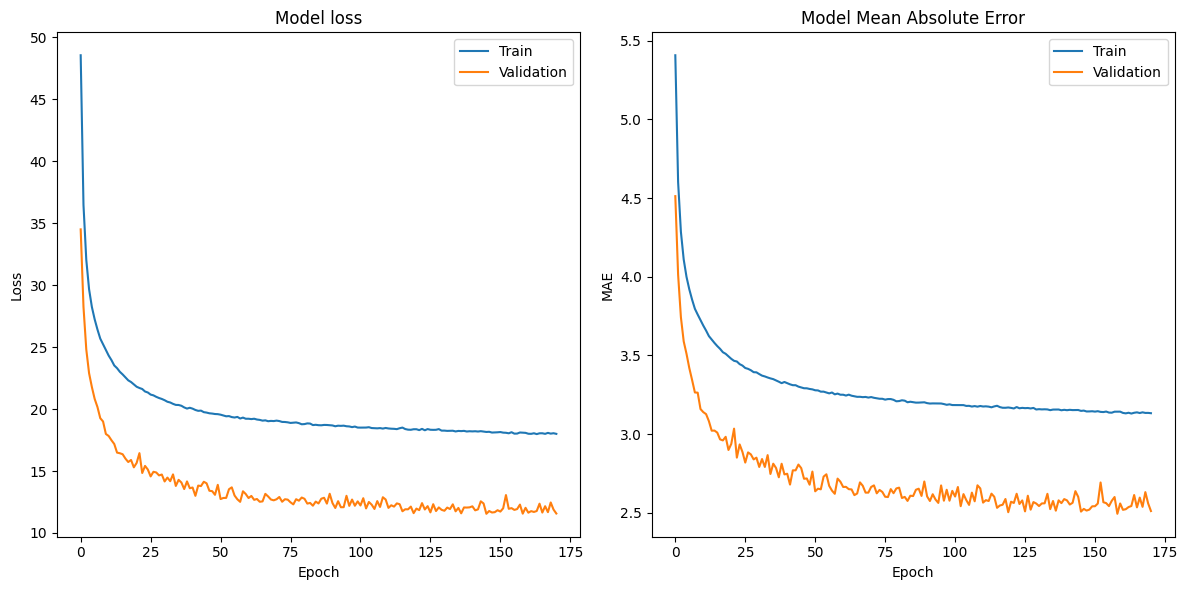

In [172]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("Model Mean Absolute Error")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.tight_layout()
plt.show()

6771/6771 ━━━━━━━━━━━━━━━━━━━━ 3s 402us/step


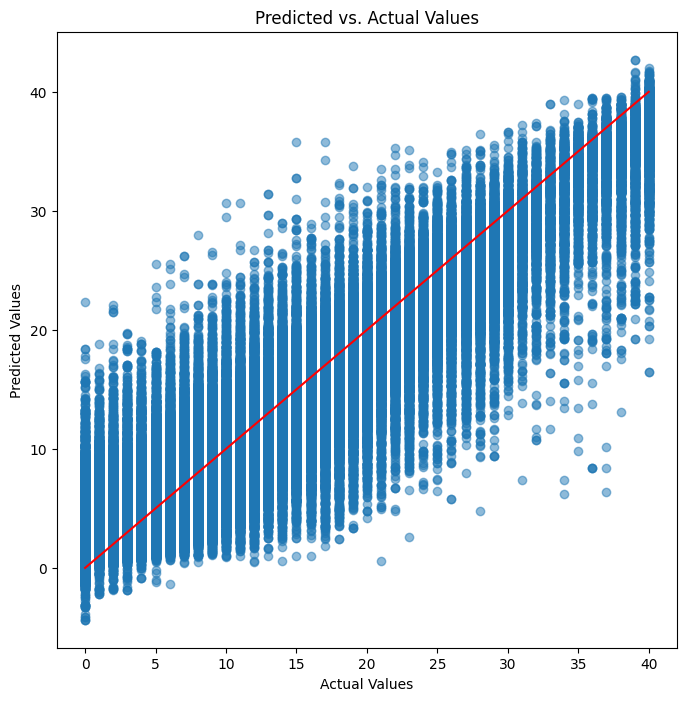

In [173]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Plot a line for perfect correlation
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")

plt.show()

### Testing Model for Prediction

In [174]:
from tensorflow.keras.models import load_model
import pickle

model = load_model("ml_model.h5", custom_objects={})
with open("preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)
# Make a prediction
import numpy as np

new_data = pd.DataFrame({
    "number": [5],
    "Temperature": [2],
    "WindSpeed": [11.43],
    "year": [2024],
    "month": [4],
    "day": [10],
    "hour": [16],
})
new_data_processed = preprocessor.transform(new_data)
prediction = model.predict(new_data_processed)
rounded_prediction = np.round(prediction[0][0])
print(int(rounded_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
24
